<a href="https://colab.research.google.com/github/prajwalmadankar0/Ethereum-Price-Prediction-with-LSTM-and-ARIMA-Model/blob/main/Prediction_of_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn import metrics
from pandas_datareader import data as pdr



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/code LSTM/ETH-USD.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


Text(0, 0.5, 'Ethereum Price')

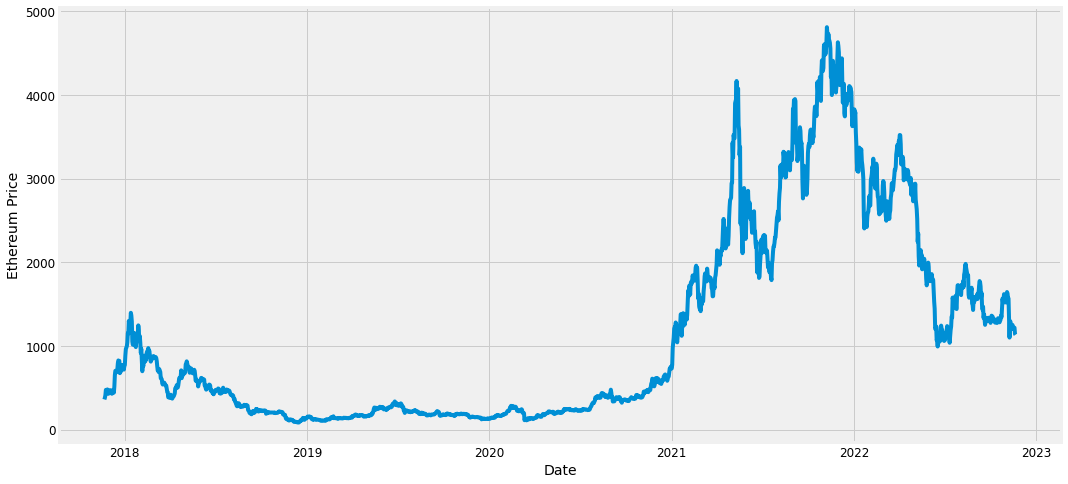

In [ ]:
data['Date']=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index=data['Date']

plt.figure(figsize=(16,8))
plt.plot(data["Close"],label='Close Price history')
plt.xlabel('Date')
plt.ylabel('Ethereum Price')

In [ ]:
data=data.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(data)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]


data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-11-21,2017-11-21,367.442993,372.470001,350.692993,360.401001,360.401001,949912000
2017-11-22,2017-11-22,360.312012,381.420013,360.147003,380.652008,380.652008,800819008
2017-11-23,2017-11-23,381.438995,425.548004,376.088013,410.165985,410.165985,1845680000
2017-11-24,2017-11-24,412.501007,480.972992,402.757996,474.911011,474.911011,2292829952
2017-11-25,2017-11-25,475.675995,485.191986,461.053009,466.276001,466.276001,1422080000
...,...,...,...,...,...,...,...
2022-11-17,2022-11-17,1215.848633,1224.965698,1189.152710,1200.808594,1200.808594,9723646871
2022-11-18,2022-11-18,1200.802124,1226.737427,1200.802124,1212.300293,1212.300293,7979913378
2022-11-19,2022-11-19,1212.215454,1227.837280,1200.475586,1218.426758,1218.426758,5978745776


In [ ]:
new_dataset

,Date,Close
0,2017-11-21 00:00:00,360.401001
1,2017-11-22 00:00:00,380.652008
2,2017-11-23 00:00:00,410.165985
3,2017-11-24 00:00:00,474.911011
4,2017-11-25 00:00:00,466.276001
...,...,...
1822,2022-11-17 00:00:00,1200.808594
1823,2022-11-18 00:00:00,1212.300293
1824,2022-11-19 00:00:00,1218.426758
1825,2022-11-20 00:00:00,1142.466675


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1827 non-null   object
 1   Close   1827 non-null   object
dtypes: object(2)
memory usage: 28.7+ KB


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

In [ ]:
final_dataset

array([[Timestamp('2017-11-21 00:00:00'), 360.401001],
       [Timestamp('2017-11-22 00:00:00'), 380.652008],
       [Timestamp('2017-11-23 00:00:00'), 410.165985],
       ...,
       [Timestamp('2022-11-19 00:00:00'), 1218.426758],
       [Timestamp('2022-11-20 00:00:00'), 1142.466675],
       [Timestamp('2022-11-21 00:00:00'), 1133.673828]], dtype=object)

In [ ]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [ ]:
train_data

array([[Timestamp('2017-11-21 00:00:00'), 360.401001],
       [Timestamp('2017-11-22 00:00:00'), 380.652008],
       [Timestamp('2017-11-23 00:00:00'), 410.165985],
       ...,
       [Timestamp('2020-08-01 00:00:00'), 385.199707],
       [Timestamp('2020-08-02 00:00:00'), 370.671722],
       [Timestamp('2020-08-03 00:00:00'), 386.295166]], dtype=object)

In [ ]:
valid_data

array([[Timestamp('2020-08-04 00:00:00'), 389.875488],
       [Timestamp('2020-08-05 00:00:00'), 401.590576],
       [Timestamp('2020-08-06 00:00:00'), 394.961945],
       ...,
       [Timestamp('2022-11-19 00:00:00'), 1218.426758],
       [Timestamp('2022-11-20 00:00:00'), 1142.466675],
       [Timestamp('2022-11-21 00:00:00'), 1133.673828]], dtype=object)

In [ ]:
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset
final_dataset

,Close
0,360.401001
1,380.652008
2,410.165985
3,474.911011
4,466.276001
...,...
1822,1200.808594
1823,1212.300293
1824,1218.426758
1825,1142.466675


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
x_train_data

array([[[0.05839797],
        [0.06268138],
        [0.06892405],
        ...,
        [0.19669737],
        [0.20135707],
        [0.20195353]],

       [[0.06268138],
        [0.06892405],
        [0.08261865],
        ...,
        [0.20135707],
        [0.20195353],
        [0.22649995]],

       [[0.06892405],
        [0.08261865],
        [0.08079221],
        ...,
        [0.20195353],
        [0.22649995],
        [0.20417021]],

       ...,

       [[0.03234304],
        [0.03381525],
        [0.03386751],
        ...,
        [0.04946986],
        [0.05293783],
        [0.05525773]],

       [[0.03381525],
        [0.03386751],
        [0.03318973],
        ...,
        [0.05293783],
        [0.05525773],
        [0.06364329]],

       [[0.03386751],
        [0.03318973],
        [0.03333976],
        ...,
        [0.05525773],
        [0.06364329],
        [0.06057039]]])

In [ ]:
y_train_data

array([2.26499949e-01, 2.04170212e-01, 1.94372811e-01, 1.90770484e-01,
       2.06116172e-01, 2.05534504e-01, 2.05352603e-01, 2.16330253e-01,
       2.45718272e-01, 2.32255286e-01, 2.08728387e-01, 2.18707715e-01,
       2.01464942e-01, 1.75870458e-01, 1.86072713e-01, 1.58715899e-01,
       1.29795128e-01, 1.49925303e-01, 1.42299308e-01, 1.55146570e-01,
       1.69118877e-01, 1.64158829e-01, 1.54480922e-01, 1.65912716e-01,
       1.60952888e-01, 1.77515205e-01, 1.80352698e-01, 1.81882805e-01,
       1.88208179e-01, 1.77591361e-01, 1.81809825e-01, 1.71552574e-01,
       1.61949764e-01, 1.54097021e-01, 1.64957100e-01, 1.59949672e-01,
       1.60858129e-01, 1.66041325e-01, 1.67934394e-01, 1.63055562e-01,
       1.66651550e-01, 1.63405420e-01, 1.63484093e-01, 1.65483553e-01,
       1.62735125e-01, 1.54965508e-01, 1.41403116e-01, 1.31200654e-01,
       1.36344720e-01, 1.27455557e-01, 1.35165091e-01, 1.30192779e-01,
       1.28288297e-01, 1.12099721e-01, 1.11467924e-01, 1.09429334e-01,
      

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(x_train_data.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(x_train_data, y_train_data, epochs = 5, batch_size = 32, verbose=2)

Epoch 1/5
29/29 - 13s - loss: 5.3407e-04 - 13s/epoch - 458ms/step
Epoch 2/5
29/29 - 6s - loss: 1.9547e-04 - 6s/epoch - 199ms/step
Epoch 3/5
29/29 - 6s - loss: 1.8697e-04 - 6s/epoch - 201ms/step
Epoch 4/5
29/29 - 6s - loss: 1.9819e-04 - 6s/epoch - 201ms/step
Epoch 5/5
29/29 - 6s - loss: 1.3761e-04 - 6s/epoch - 200ms/step


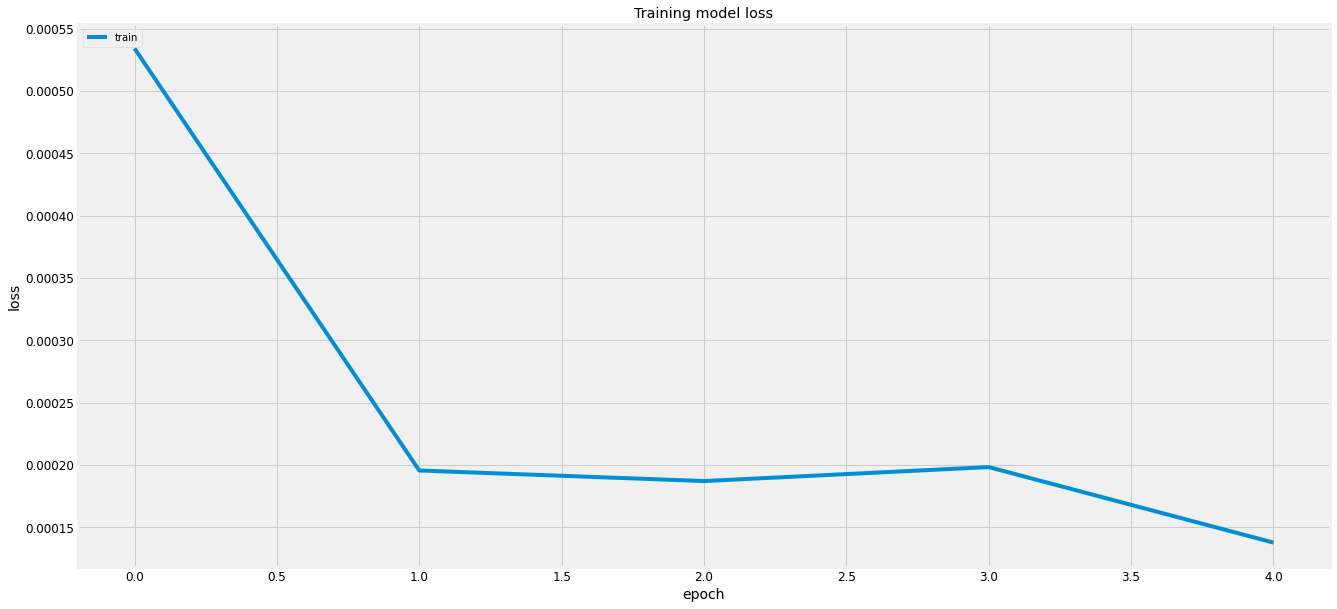

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('/content/drive/MyDrive/code LSTM/ETH-USD.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = scaler.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1767, 60, 1)

In [ ]:
X_test

array([[[0.05839797],
        [0.06268138],
        [0.06892405],
        ...,
        [0.19669737],
        [0.20135707],
        [0.20195353]],

       [[0.06268138],
        [0.06892405],
        [0.08261865],
        ...,
        [0.20135707],
        [0.20195353],
        [0.22649995]],

       [[0.06892405],
        [0.08261865],
        [0.08079221],
        ...,
        [0.20195353],
        [0.22649995],
        [0.20417021]],

       ...,

       [[0.26229649],
        [0.24711381],
        [0.2629928 ],
        ...,
        [0.23928661],
        [0.23615746],
        [0.23858813]],

       [[0.24711381],
        [0.2629928 ],
        [0.26311534],
        ...,
        [0.23615746],
        [0.23858813],
        [0.23988398]],

       [[0.2629928 ],
        [0.26311534],
        [0.26094387],
        ...,
        [0.23858813],
        [0.23988398],
        [0.22381722]]])

In [ ]:
y_test

array([[1155.150024],
       [1049.579956],
       [1003.26001 ],
       ...,
       [1218.426758],
       [1142.466675],
       [1133.673828]])

In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

56/56 [==============================] - 5s 62ms/step


(1767, 1)

In [ ]:
predicted_price = scaler.inverse_transform(y_pred)

In [ ]:
type(predicted_price)

numpy.ndarray

In [ ]:
predicted_price.shape

(1767, 1)

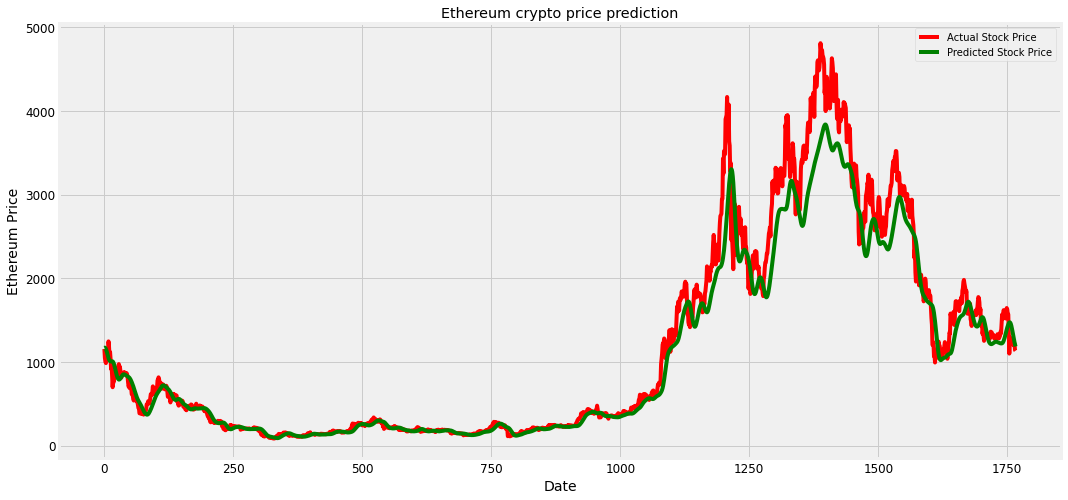

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')

plt.title('Ethereum crypto price prediction')
plt.xlabel('Date')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

## Implement the **ARIMA** Model

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/code LSTM/ETH-USD.csv")

stock=df1

In [ ]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-21,367.442993,372.470001,350.692993,360.401001,360.401001,949912000
1,2017-11-22,360.312012,381.420013,360.147003,380.652008,380.652008,800819008
2,2017-11-23,381.438995,425.548004,376.088013,410.165985,410.165985,1845680000
3,2017-11-24,412.501007,480.972992,402.757996,474.911011,474.911011,2292829952
4,2017-11-25,475.675995,485.191986,461.053009,466.276001,466.276001,1422080000


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [ ]:
stock['Date'].min()

'2017-11-21'

In [ ]:
stock['Date'].max()

'2022-11-21'

In [ ]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

# Data Preprocessing

In [ ]:
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')

In [ ]:
stock.isnull().sum()

Date     0
Close    0
dtype: int64

In [ ]:
stock = stock.groupby('Date')['Close'].sum().reset_index()

In [ ]:
stock.head()

,Date,Close
0,2017-11-21,360.401001
1,2017-11-22,380.652008
2,2017-11-23,410.165985
3,2017-11-24,474.911011
4,2017-11-25,466.276001


# Indexing with time series data

In [ ]:
stock = stock.set_index('Date')
stock.index

Index(['2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24', '2017-11-25',
       '2017-11-26', '2017-11-27', '2017-11-28', '2017-11-29', '2017-11-30',
       ...
       '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16',
       '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21'],
      dtype='object', name='Date', length=1827)

In [ ]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Close.resample('M').mean()

In [ ]:
monthly_mean['2018':]

Date
2018-01-31    1103.646004
2018-02-28     873.116318
2018-03-31     625.761325
2018-04-30     521.103667
2018-05-31     678.795519
2018-06-30     520.528231
2018-07-31     463.327677
2018-08-31     322.050938
2018-09-30     227.460833
2018-10-31     209.963935
2018-11-30     169.047770
2018-12-31     108.998097
2019-01-31     128.174619
2019-02-28     127.220948
2019-03-31     137.327039
2019-04-30     165.603831
2019-05-31     220.185853
2019-06-30     274.758299
2019-07-31     248.289667
2019-08-31     199.817084
2019-09-30     185.992064
2019-10-31     179.252077
2019-11-30     173.651951
2019-12-31     138.041703
2020-01-31     156.972718
2020-02-29     238.756287
2020-03-31     160.376243
2020-04-30     171.946989
2020-05-31     208.125855
2020-06-30     236.159229
2020-07-31     259.405542
2020-08-31     402.153482
2020-09-30     368.373035
2020-10-31     376.222389
2020-11-30     486.144514
2020-12-31     622.488431
2021-01-31    1202.502802
2021-02-28    1699.808921
2021-03

# Visualizing close time series data

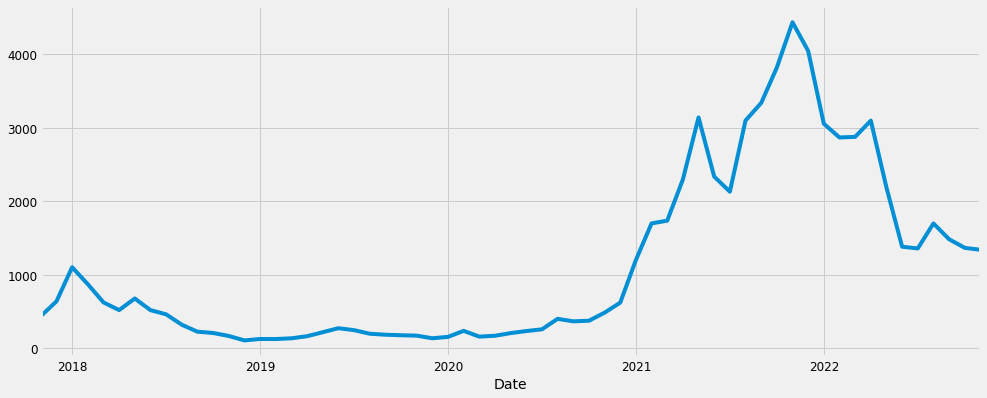

In [ ]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

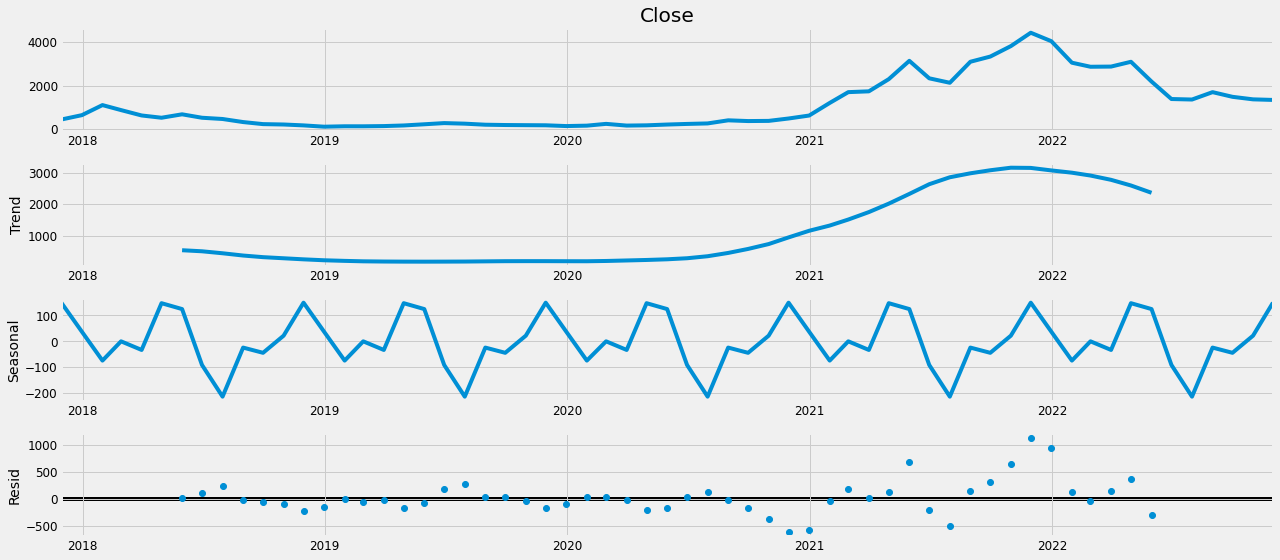

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

# The plot above clearly shows that the Close price is unstable, along with its obvious seasonality.

As cryptos like Ethereum is a volatile asset, this unpredictability is expected. So, we need to apply **Time series forecasting ARIMA** to further refine the results and to produce more accurate results.

Parameter Selection for the ARIMA Time Series Model. ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1061.0215979125198
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:842.517025504906
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:843.321294436925
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:641.2932636278213
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:858.8905150722884
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:836.4503016342323
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:658.5716669642319
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:643.1904240417502
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:971.5115458635858
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:775.1494957825012
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:775.4155679959988
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:584.648296827661
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:803.5907326040154
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:772.4164794491603
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:616.7062489282821
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:586.59170650507
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:861.0823659717756
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:696.1123538033119
ARIMA(0, 1, 0)

In [ ]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum:
        minimum = i
i=l_results_aic.index(minimum)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2166      0.459     -0.472      0.637      -1.116       0.682
ma.L1          0.6917      0.393      1.762      0.078      -0.078       1.461
ar.S.L12      -0.9301      0.368     -2.529      0.011      -1.651      -0.209
sigma2      1.719e+05   6.34e+04      2.711      0.007    4.76e+04    2.96e+05


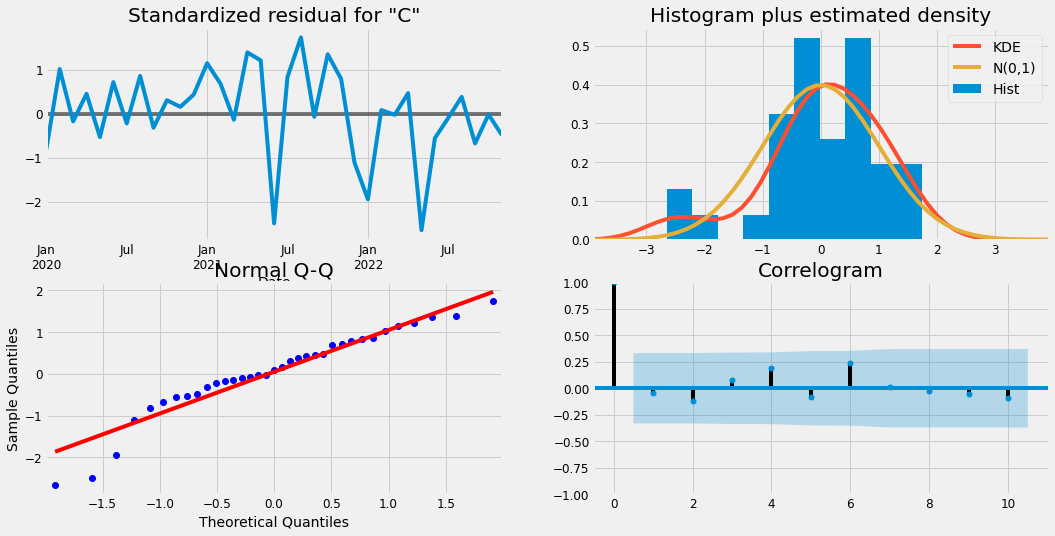

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# **Validating Forecasts**

To help us understand the accuracy of our forecasts, we compare predicted Close to real close price of the time series, and we set forecasts to start at 2017-12-31 to the end of the data.

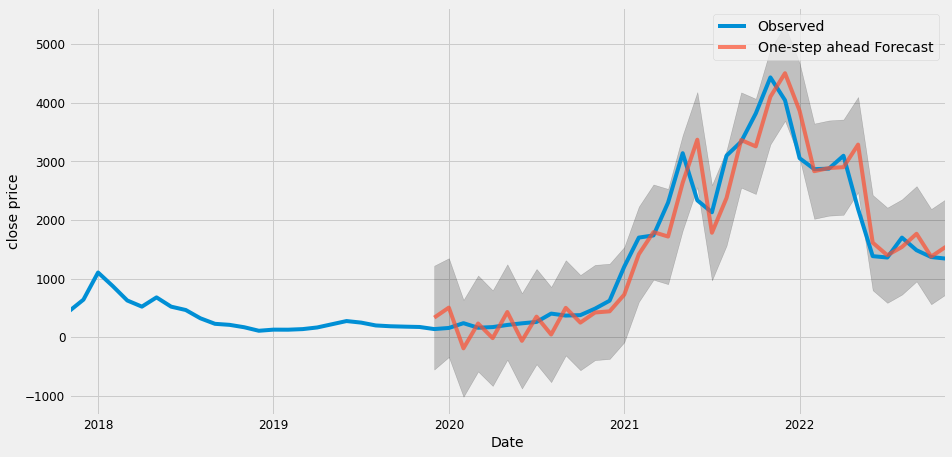

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2016':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 169068.72


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 411.18


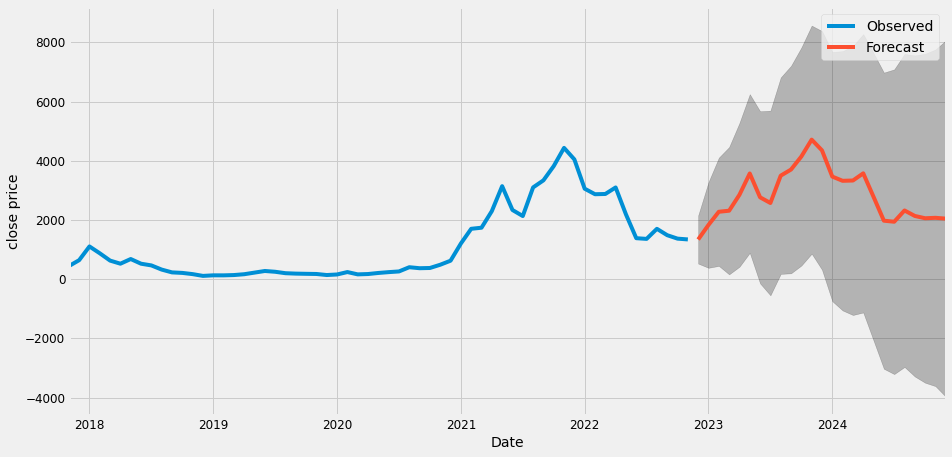

In [ ]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()